In [19]:
# https://github.com/uliuphoff/fbpostview.git

import json
import textwrap as tr
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def imageplot(images, columns=2):
    
    l = len(images)
    
    if l == 1:
        rows = 1
        columns = 1
        plt.imshow(images[0])
        plt.axis('off')
        plt.show()
    else:
        rows = int(l/columns)+1
    
        fig = plt.figure(figsize=(12,4*rows))
        for i in range(1, l):
            img = images[i-1]
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
    return



with open('your_posts.json', 'r') as f:
    fb_string = json.load(f)
    
#dump = json.dumps(fb_string[0:8], indent=2)    
    
print(f"We have {len(fb_string)} postings.")

We have 3139 postings.


24-02-2020
Uli Uphoff -> Wolfgang Gablers Chronik
Herzlichen Glückwunsch und alles Gute zum Geburtstag, lieber
Wolfgang. Weiterhin viel Spaß am Sport und tolle Reisen!
---


20-02-2020
Uli Uphoff -> CAMPSTER & CROSSCAMP
Viele Grüße an den weißen Münchener Campster 🚚, der sich
genau wie ich gerade durch den Öberföhringer
Feierabendverkehr gequält hat... Wenn ich einen Campster
sehe kriege ich immer gute Laune!
---


18-02-2020
Uli Uphoff -> Anna Katharinas Chronik
Herzlichen Glückwunsch und alles Gute zum Geburtstag!
---


16-02-2020
Uli Uphoff
Oh Mann, so gut. Lemmy, we miss you so much.


<Figure size 864x288 with 0 Axes>

---


15-02-2020
Uli Uphoff -> CAMPSTER & CROSSCAMP
Nur mal ein kleiner Post, weil die letzten beiden Wochen mit
dem Campster so viel Spaß gemacht haben. Wir haben gedacht,
wir probieren Wintercamping einfach mal aus und es hat
wunderbar geklappt. Das eine Wochenende in Österreich bei
Lofer, das zweite Wochenende in der Nähe von Füssen, jeweils
auf Campingplätzen. Gemütlich war’s, abends mit der
Standheizung, beim zweiten Mal hatten wir auch unsere neuen
Isomatten für die Fenster dabei. Nachts ist es uns dann
sogar zu warm geworden und wir mussten die Heizung
runterregeln. Somit Alles easy, Winter kein Problem.
Campstern ist einfach klasse zu jeder Jahreszeit!


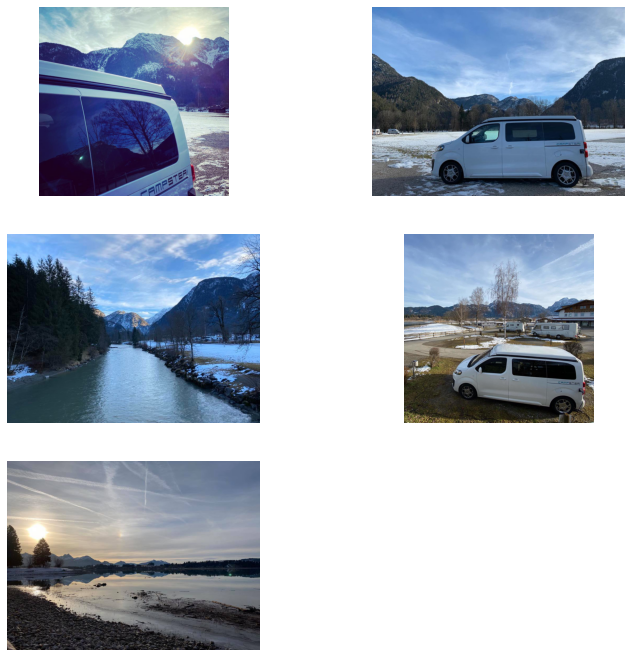

---


15-02-2020
Uli Uphoff hat ein neues Foto zu Joe Blacks Chronik hinzugefügt.


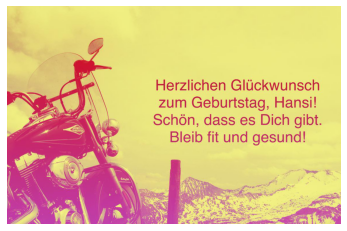

---




In [20]:
for post in fb_string[0:6]:
    timestamp = post['timestamp']
    if "title" in post:
        title = post['title']
        title = title.replace('hat etwas in', '->').replace(' geschrieben.', '').replace(' gepostet.', '')
    else:
        title = " - "
    print(str(datetime.fromtimestamp(timestamp).strftime("%d-%m-%Y")))
    print(title.encode('latin-1').decode('utf-8')) 
    if "data" in post:
        data = post['data']
        
        if len(data)>0:
            if 'post' in data[0]:
                text = data[0]['post'].encode('latin-1').decode('utf-8') 
                lines = tr.wrap(text, width=60)
                for i in lines:
                    print(i)
                
    if "attachments" in post:
        attachments = post['attachments']
        for attm in attachments:
            if 'data' in attm:
                data_a = attm['data']
                images=[]
                for dat in data_a:
                    if "media" in dat:
                        image = dat['media']['uri']
                        if image.endswith('jpg'):
                            images.append(mpimg.imread(image))
                            #imgplot = plt.imshow(img)
                            #plt.show()
                    
                imageplot(images)
                        
    print("---\n\n")
            